In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Listings.csv", encoding="latin1", dtype={"host_location": str, "zipcode": str},low_memory=False, on_bad_lines='skip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [ ]:
df["room_type"].unique()

array(['Entire place', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [ ]:
df.corr(numeric_only=True)

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
listing_id,1.000000,0.582679,-0.014195,0.109949,0.071972,-0.012022,-0.001949,-0.005969,0.006881,0.011471,-0.034967,-0.005873,-0.026382,-0.047476,-0.025831,-0.065647,-0.067393,0.016243,-0.020410
host_id,0.582679,1.000000,-0.082474,0.122923,0.015198,0.005266,0.008961,-0.014839,-0.001526,0.011795,-0.038348,-0.003148,-0.089288,-0.095226,-0.055538,-0.100904,-0.103973,-0.046701,-0.067068
host_response_rate,-0.014195,-0.082474,1.000000,0.321510,0.037986,-0.015872,-0.018426,0.012068,-0.007806,-0.000697,-0.012630,0.000048,0.112409,0.108358,0.118284,0.106289,0.120641,0.091927,0.099234
host_acceptance_rate,0.109949,0.122923,0.321510,1.000000,0.034085,0.073135,-0.003525,-0.008704,-0.045264,-0.039315,-0.045547,0.000307,-0.017294,-0.007801,0.028197,-0.013868,-0.011385,0.005349,0.000529
host_total_listings_count,0.071972,0.015198,0.037986,0.034085,1.000000,-0.042281,0.061737,-0.018868,-0.009910,0.009907,-0.000161,-0.000303,-0.037162,-0.040658,-0.016856,-0.036414,-0.045739,-0.005259,-0.049027
latitude,-0.012022,0.005266,-0.015872,0.073135,-0.042281,1.000000,-0.417783,-0.111880,-0.137463,-0.099278,0.046801,0.001569,-0.034199,-0.007049,-0.035079,-0.023368,-0.011368,-0.043589,-0.022222
longitude,-0.001949,0.008961,-0.018426,-0.003525,0.061737,-0.417783,1.000000,0.009465,0.037800,0.019608,-0.056316,-0.001410,-0.048905,-0.052181,-0.045029,-0.043660,-0.033794,-0.052074,-0.039725
accommodates,-0.005969,-0.014839,0.012068,-0.008704,-0.018868,-0.111880,0.009465,1.000000,0.639102,0.146327,-0.033442,0.003241,0.006420,-0.009308,0.007203,0.004743,-0.000910,0.008774,-0.023706
bedrooms,0.006881,-0.001526,-0.007806,-0.045264,-0.009910,-0.137463,0.037800,0.639102,1.000000,0.143307,-0.010582,0.000872,0.009007,-0.010811,0.002247,0.005562,-0.004753,0.008412,-0.019745
price,0.011471,0.011795,-0.000697,-0.039315,0.009907,-0.099278,0.019608,0.146327,0.143307,1.000000,0.006344,-0.000442,0.015048,-0.000693,0.024328,-0.000243,-0.003262,-0.000609,0.001572


In [ ]:
selected_cols = ["host_since","neighbourhood","city","room_type","bedrooms","accommodates", "price","review_scores_accuracy", "host_is_superhost"  ]
df = df[selected_cols]

#Filter only New York listings (case-insensitive)
df_ny = df[df["city"].str.lower().str.contains("new york", na=False)].copy()


In [ ]:
import numpy as np
df_ny["log_price"] = np.log1p(df_ny["price"])  # log(price + 1)


In [ ]:
df_ny.isnull().sum()


,0
host_since,18
neighbourhood,0
city,0
room_type,0
bedrooms,3608
accommodates,0
price,0
review_scores_accuracy,10259
host_is_superhost,18
log_price,0


In [ ]:
#remove nulls where host_since is null
df_ny.dropna(subset=["host_since"], inplace=True)


In [ ]:
#convert host since into date type
df_ny["host_since"] = pd.to_datetime(df_ny["host_since"])

In [ ]:
# Fill missing numeric columns with median values
df_ny["bedrooms"].fillna(df_ny["bedrooms"].median(), inplace=True)
df_ny["review_scores_accuracy"].fillna(df_ny["review_scores_accuracy"].median(), inplace=True)


/tmp/ipython-input-4150332850.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ny["bedrooms"].fillna(df_ny["bedrooms"].median(), inplace=True)
/tmp/ipython-input-4150332850.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
df_ny.isnull().sum()

,0
host_since,0
neighbourhood,0
city,0
room_type,0
bedrooms,0
accommodates,0
price,0
review_scores_accuracy,0
host_is_superhost,0
log_price,0


In [ ]:
df_ny.corr(numeric_only=True)

,bedrooms,accommodates,price,review_scores_accuracy,log_price
bedrooms,1.000000,0.708169,0.245556,-0.001068,0.419345
accommodates,0.708169,1.000000,0.276491,-0.026122,0.519178
price,0.245556,0.276491,1.000000,0.013834,0.588191
review_scores_accuracy,-0.001068,-0.026122,0.013834,1.000000,0.046106
log_price,0.419345,0.519178,0.588191,0.046106,1.000000


In [ ]:
#removing values where accomodates and prices are zero
df_ny = df_ny[(df_ny["accommodates"] > 0) & (df_ny["price"] > 0)]
df_ny

,host_since,neighbourhood,city,room_type,bedrooms,accommodates,price,review_scores_accuracy,host_is_superhost,log_price
9220,2013-10-23,Lower East Side,New York,Entire place,1.0,3,110,10.0,f,4.709530
9221,2013-10-02,Harlem,New York,Entire place,1.0,2,99,10.0,f,4.605170
9222,2014-09-27,Crown Heights,New York,Entire place,3.0,6,220,9.0,f,5.398163
9223,2014-10-18,Nolita,New York,Entire place,1.0,2,215,10.0,f,5.375278
9224,2012-10-14,Midtown,New York,Entire place,1.0,3,300,9.0,f,5.707110
...,...,...,...,...,...,...,...,...,...,...
268684,2014-06-29,Williamsburg,New York,Entire place,1.0,5,115,10.0,f,4.753590
268685,2014-06-02,Williamsburg,New York,Entire place,1.0,2,140,10.0,f,4.948760
268686,2016-01-01,West Village,New York,Entire place,1.0,2,100,10.0,t,4.615121
268687,2021-01-02,Bushwick,New York,Entire place,1.0,5,188,10.0,f,5.241747


In [ ]:
df_ny.isnull().sum()

,0
host_since,0
neighbourhood,0
city,0
room_type,0
bedrooms,0
accommodates,0
price,0
review_scores_accuracy,0
host_is_superhost,0
log_price,0


In [ ]:
df_ny.describe()

,host_since,bedrooms,accommodates,price,review_scores_accuracy,log_price
count,36966,36966.000000,36966.000000,36966.000000,36966.000000,36966.000000
mean,2015-10-06 11:24:44.758967808,1.285803,2.798463,142.966320,9.700996,4.631465
min,2008-08-22 00:00:00,1.000000,1.000000,10.000000,2.000000,2.397895
25%,2013-10-31 00:00:00,1.000000,2.000000,60.000000,10.000000,4.110874
50%,2015-08-05 00:00:00,1.000000,2.000000,99.000000,10.000000,4.605170
75%,2017-10-01 00:00:00,1.000000,4.000000,151.000000,10.000000,5.023881
max,2021-02-02 00:00:00,21.000000,16.000000,10000.000000,10.000000,9.210440
std,NaN,0.692670,1.845548,275.877746,0.819651,0.716316


<Axes: ylabel='price'>

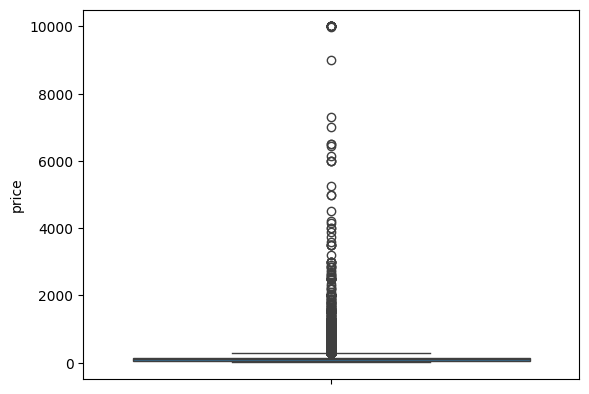

In [ ]:
sns.boxplot(df_ny["price"])

In [ ]:
from datetime import datetime

df_ny["host_since"] = pd.to_datetime(df_ny["host_since"], errors="coerce")
df_ny["host_tenure_years"] = (
    datetime.now().year - df_ny["host_since"].dt.year
)

df_ny.drop("host_since", axis=1, inplace=True)


In [ ]:
df_ny["price_per_person"] = df_ny["price"] / df_ny["accommodates"]
df_ny




,neighbourhood,city,room_type,bedrooms,accommodates,price,review_scores_accuracy,host_is_superhost,log_price,host_tenure_years,price_per_person
9220,Lower East Side,New York,Entire place,1.0,3,110,10.0,f,4.709530,12,36.666667
9221,Harlem,New York,Entire place,1.0,2,99,10.0,f,4.605170,12,49.500000
9222,Crown Heights,New York,Entire place,3.0,6,220,9.0,f,5.398163,11,36.666667
9223,Nolita,New York,Entire place,1.0,2,215,10.0,f,5.375278,11,107.500000
9224,Midtown,New York,Entire place,1.0,3,300,9.0,f,5.707110,13,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
268684,Williamsburg,New York,Entire place,1.0,5,115,10.0,f,4.753590,11,23.000000
268685,Williamsburg,New York,Entire place,1.0,2,140,10.0,f,4.948760,11,70.000000
268686,West Village,New York,Entire place,1.0,2,100,10.0,t,4.615121,9,50.000000
268687,Bushwick,New York,Entire place,1.0,5,188,10.0,f,5.241747,4,37.600000


In [ ]:
df_ny["host_is_superhost"] = df_ny["host_is_superhost"].map({"t": 1, "f": 0})


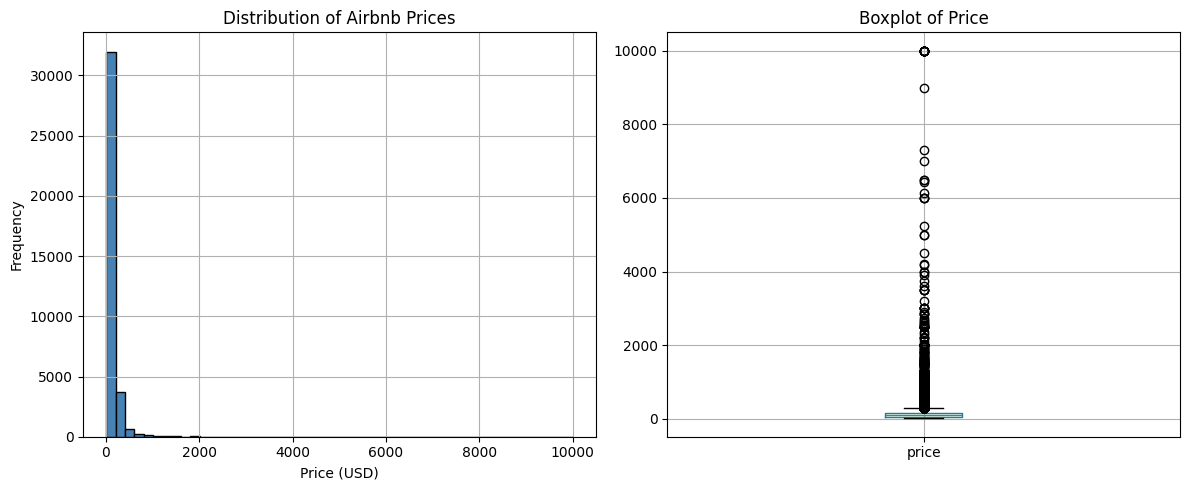

In [ ]:
#data is right skewed
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1, 2, 1)
df_ny["price"].hist(bins=50, color='steelblue', edgecolor='black')
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(1, 2, 2)
df_ny.boxplot(column="price")
plt.title("Boxplot of Price")

plt.tight_layout()
plt.show()


In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Remove outliers for both columns
df_ny_clean = remove_outliers_iqr(df_ny, "price")
df_ny_clean = remove_outliers_iqr(df_ny_clean, "accommodates")

# Compare before/after
print(f"Before: {len(df_ny)} listings")
print(f"After removing outliers: {len(df_ny_clean)} listings")

Before: 36966 listings
After removing outliers: 31066 listings


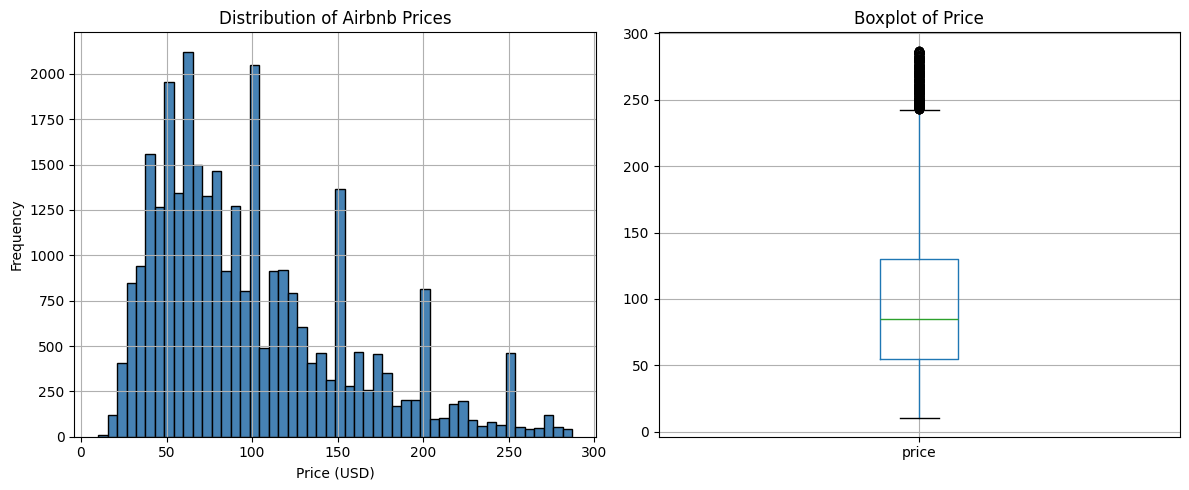

In [ ]:
plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1, 2, 1)
df_ny_clean["price"].hist(bins=50, color='steelblue', edgecolor='black')
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(1, 2, 2)
df_ny_clean.boxplot(column="price")
plt.title("Boxplot of Price")

plt.tight_layout()
plt.show()

In [ ]:
df_ny_clean["neighbourhood"].value_counts()

,count
neighbourhood,
Williamsburg,2413
Bedford-Stuyvesant,2289
Harlem,1695
Bushwick,1510
Hell's Kitchen,1195
...,...
Howland Hook,1
Country Club,1
Gerritsen Beach,1


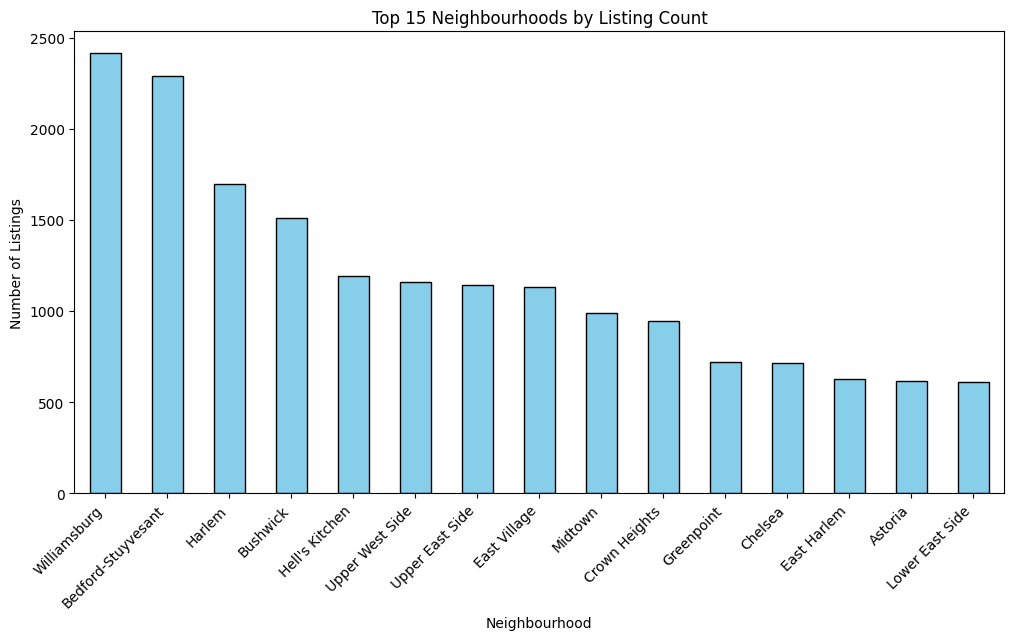

In [ ]:
#which neighbourhood has more airbnb listings

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df_ny_clean["neighbourhood"].value_counts().head(15).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 15 Neighbourhoods by Listing Count")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Group by neighbourhood and compute average price
ny_avg_price = df_ny_clean.groupby("neighbourhood").agg({"price": "mean"})

# Sort descending by price
ny_avg_price.sort_values("price", ascending=False, inplace=True)

# Optional: reset index for easier plotting
ny_avg_price.reset_index(inplace=True)

# Display top 10 neighbourhoods by average price
ny_avg_price
# Create a new column for average price per neighbourhood
df_ny_clean["neighbourhood_avg_price"] = (
    df_ny_clean.groupby("neighbourhood")["price"].transform("mean")
)




/tmp/ipython-input-2474361179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ny_avg_price.head(10), x="neighbourhood", y="price", palette="coolwarm")


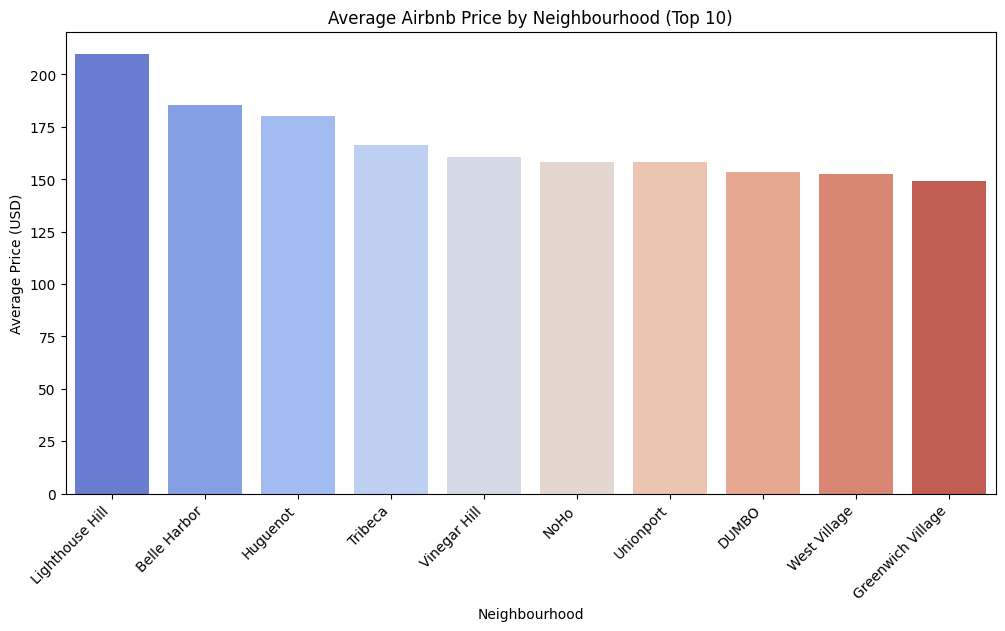

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=ny_avg_price.head(10), x="neighbourhood", y="price", palette="coolwarm")
plt.title("Average Airbnb Price by Neighbourhood (Top 10)")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45, ha='right')
plt.show()


**AVERAGE PRICE PER PERSON BY Neighbourhood**

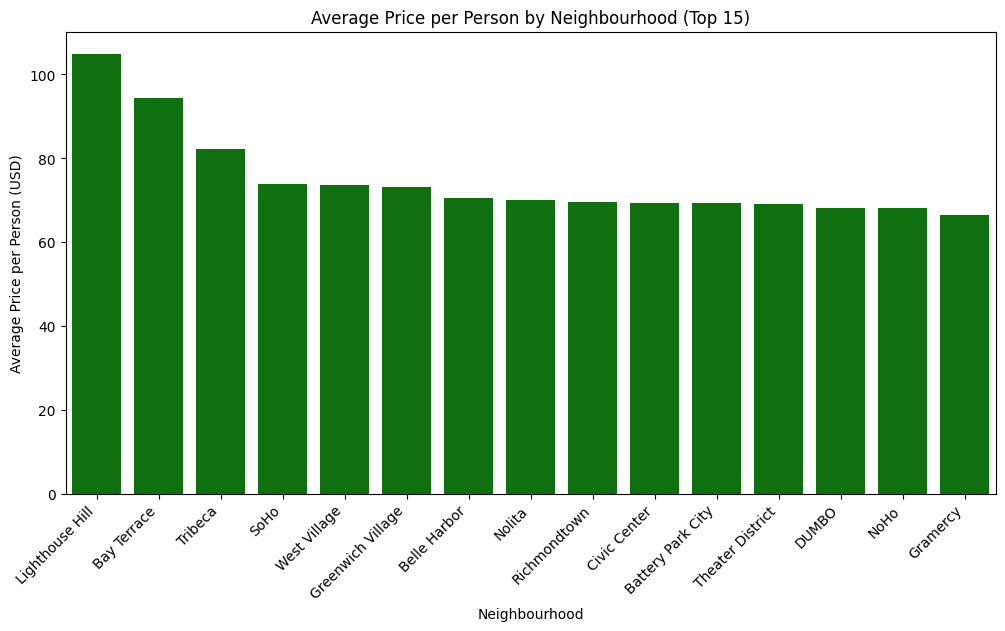

In [ ]:
import seaborn as sns

avg_ppp = df_ny_clean.groupby("neighbourhood")["price_per_person"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_ppp.index, y=avg_ppp.values, color="green")
plt.title("Average Price per Person by Neighbourhood (Top 15)")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price per Person (USD)")
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
df_ny_clean

,neighbourhood,city,room_type,bedrooms,accommodates,price,review_scores_accuracy,host_is_superhost,log_price,host_tenure_years,price_per_person,neighbourhood_avg_price
9220,Lower East Side,New York,Entire place,1.0,3,110,10.0,0,4.709530,12,36.666667,115.040984
9221,Harlem,New York,Entire place,1.0,2,99,10.0,0,4.605170,12,49.500000,85.814749
9223,Nolita,New York,Entire place,1.0,2,215,10.0,0,5.375278,11,107.500000,133.860465
9225,Lower East Side,New York,Entire place,1.0,2,120,10.0,0,4.795791,12,60.000000,115.040984
9226,Greenwich Village,New York,Entire place,1.0,3,200,10.0,0,5.303305,13,66.666667,149.367150
...,...,...,...,...,...,...,...,...,...,...,...,...
268682,Williamsburg,New York,Entire place,1.0,2,120,10.0,0,4.795791,5,60.000000,105.522586
268683,Greenwich Village,New York,Entire place,1.0,2,71,10.0,0,4.276666,9,35.500000,149.367150
268685,Williamsburg,New York,Entire place,1.0,2,140,10.0,0,4.948760,11,70.000000,105.522586
268686,West Village,New York,Entire place,1.0,2,100,10.0,1,4.615121,9,50.000000,152.573196


**RELATIONSHIP BETWEEN HOST TENURE AND PRICE**

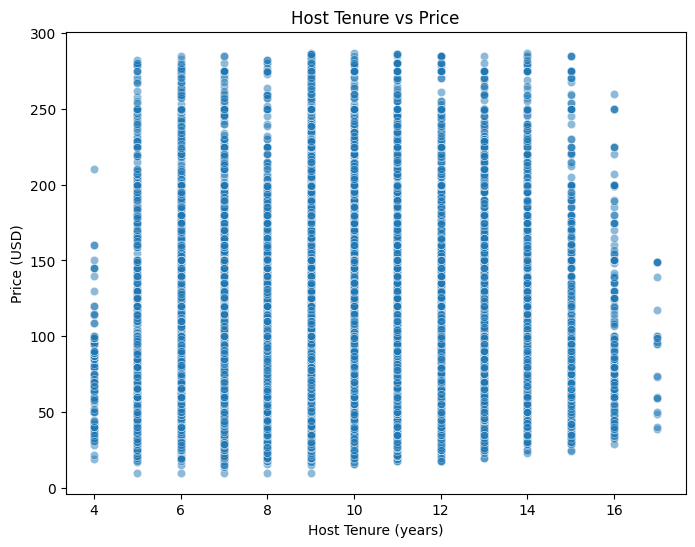

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="host_tenure_years",
    y="price",
    data=df_ny_clean,
    alpha=0.5
)
plt.title("Host Tenure vs Price")
plt.xlabel("Host Tenure (years)")
plt.ylabel("Price (USD)")
plt.show()


In [ ]:
top_neigh = df_ny_clean["neighbourhood"].value_counts().nlargest(10).index
df_ny_clean["neighbourhood_grouped"] = df_ny_clean["neighbourhood"].apply(
    lambda x: x if x in top_neigh else "Other"
)


**DISTRIBUTION OF ROOM TYPE**

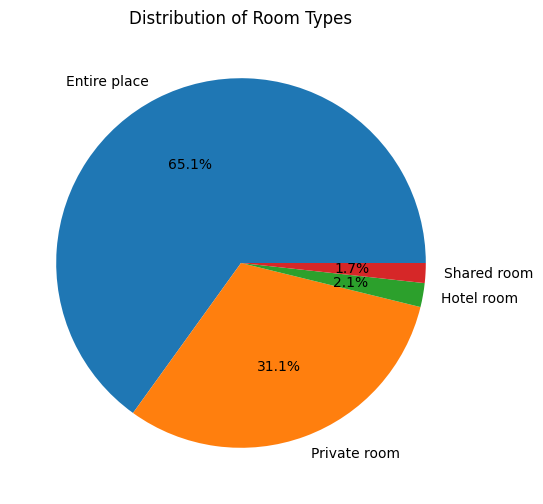

In [ ]:
room_counts = df['room_type'].value_counts()
plt.figure(figsize=(8, 6))
room_counts.plot(kind='pie', color='skyblue', autopct='%1.1f%%')
plt.title('Distribution of Room Types')
plt.ylabel('')
plt.show()




In [ ]:
df_ny_clean

,neighbourhood,city,room_type,bedrooms,accommodates,price,review_scores_accuracy,host_is_superhost,log_price,host_tenure_years,price_per_person,neighbourhood_avg_price,neighbourhood_grouped
9220,Lower East Side,New York,Entire place,1.0,3,110,10.0,0,4.709530,12,36.666667,115.040984,Other
9221,Harlem,New York,Entire place,1.0,2,99,10.0,0,4.605170,12,49.500000,85.814749,Harlem
9223,Nolita,New York,Entire place,1.0,2,215,10.0,0,5.375278,11,107.500000,133.860465,Other
9225,Lower East Side,New York,Entire place,1.0,2,120,10.0,0,4.795791,12,60.000000,115.040984,Other
9226,Greenwich Village,New York,Entire place,1.0,3,200,10.0,0,5.303305,13,66.666667,149.367150,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268682,Williamsburg,New York,Entire place,1.0,2,120,10.0,0,4.795791,5,60.000000,105.522586,Williamsburg
268683,Greenwich Village,New York,Entire place,1.0,2,71,10.0,0,4.276666,9,35.500000,149.367150,Other
268685,Williamsburg,New York,Entire place,1.0,2,140,10.0,0,4.948760,11,70.000000,105.522586,Williamsburg
268686,West Village,New York,Entire place,1.0,2,100,10.0,1,4.615121,9,50.000000,152.573196,Other


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
features = [
    "accommodates", "room_type","bedrooms","neighbourhood",
    "host_tenure_years","neighbourhood_avg_price","host_is_superhost","review_scores_accuracy","neighbourhood_grouped"
]

X = df_ny_clean[features].copy()
y = df_ny_clean["log_price"].copy()




In [ ]:

numeric_features = ["accommodates","bedrooms","host_tenure_years","review_scores_accuracy"]
categorical_features = ["room_type", "neighbourhood_grouped",
    "host_is_superhost"
]



In [ ]:
# OneHotEncode categoricals, scale numerics
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ]
)


In [ ]:
# Combine preprocessing + model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['accommodates', 'bedrooms',
                                                   'host_tenure_years',
                                                   'review_scores_accuracy']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['room_type',
                                                   'neighbourhood_grouped',
                                                   'host_is_superhost'])])),
                ('regressor', LinearRegression())])

In [ ]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

y_pred_dollar = np.expm1(y_pred)


print("Linear Regression Model Performance:")
print(f"MAE  : {mae:.3f}")  #The average difference between your predictions and the actual values.
print(f"RMSE : {rmse:.3f}") #The square root of the average of the squared errors., This is also a measure of the average error, but it's more sensitive to big mistakes
print(f"R²   : {r2:.3f}")  #This tells you how good your model is, compared to a very simple model that just guesses the average price every time.


Linear Regression Model Performance:
MAE  : 0.331
RMSE : 0.416
R²   : 0.444


In [ ]:
y_pred_dollar = np.expm1(y_pred)
y_pred_dollar

array([104.89116352,  96.34624145,  71.21106824, ...,  46.47330952,
       106.87908226, 136.63315985])

RANDOM FOREST


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# One-hot encode room_type and neighbourhood_grouped
X_rf = X.copy()
X_rf = pd.get_dummies(X_rf, columns=["room_type", "neighbourhood_grouped"], drop_first=True) #encode and drop the original
X_rf.drop("neighbourhood", axis=1, inplace=True)

In [ ]:
X_rf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31066 entries, 9220 to 273167
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   accommodates                           31066 non-null  int64  
 1   bedrooms                               31066 non-null  float64
 2   host_tenure_years                      31066 non-null  int32  
 3   neighbourhood_avg_price                31066 non-null  float64
 4   host_is_superhost                      31066 non-null  int64  
 5   review_scores_accuracy                 31066 non-null  float64
 6   room_type_Hotel room                   31066 non-null  bool   
 7   room_type_Private room                 31066 non-null  bool   
 8   room_type_Shared room                  31066 non-null  bool   
 9   neighbourhood_grouped_Bushwick         31066 non-null  bool   
 10  neighbourhood_grouped_Crown Heights    31066 non-null  bool   
 11  nei

In [ ]:
X_rf.head()

,accommodates,bedrooms,host_tenure_years,neighbourhood_avg_price,host_is_superhost,review_scores_accuracy,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_grouped_Bushwick,neighbourhood_grouped_Crown Heights,neighbourhood_grouped_East Village,neighbourhood_grouped_Harlem,neighbourhood_grouped_Hell's Kitchen,neighbourhood_grouped_Midtown,neighbourhood_grouped_Other,neighbourhood_grouped_Upper East Side,neighbourhood_grouped_Upper West Side,neighbourhood_grouped_Williamsburg
9220,3,1.0,12,115.040984,0,10.0,False,False,False,False,False,False,False,False,False,True,False,False,False
9221,2,1.0,12,85.814749,0,10.0,False,False,False,False,False,False,True,False,False,False,False,False,False
9223,2,1.0,11,133.860465,0,10.0,False,False,False,False,False,False,False,False,False,True,False,False,False
9225,2,1.0,12,115.040984,0,10.0,False,False,False,False,False,False,False,False,False,True,False,False,False
9226,3,1.0,13,149.367150,0,10.0,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y, test_size=0.2, random_state=42
)


In [ ]:
X_train_rf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24852 entries, 114680 to 195085
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   accommodates                           24852 non-null  int64  
 1   bedrooms                               24852 non-null  float64
 2   host_tenure_years                      24852 non-null  int32  
 3   neighbourhood_avg_price                24852 non-null  float64
 4   host_is_superhost                      24852 non-null  int64  
 5   review_scores_accuracy                 24852 non-null  float64
 6   room_type_Hotel room                   24852 non-null  bool   
 7   room_type_Private room                 24852 non-null  bool   
 8   room_type_Shared room                  24852 non-null  bool   
 9   neighbourhood_grouped_Bushwick         24852 non-null  bool   
 10  neighbourhood_grouped_Crown Heights    24852 non-null  bool   
 11  n

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_model.predict(X_test_rf)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test_rf, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))
r2 = r2_score(y_test_rf, y_pred_rf)

print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")


MAE:  0.290
RMSE: 0.371
R²:   0.559


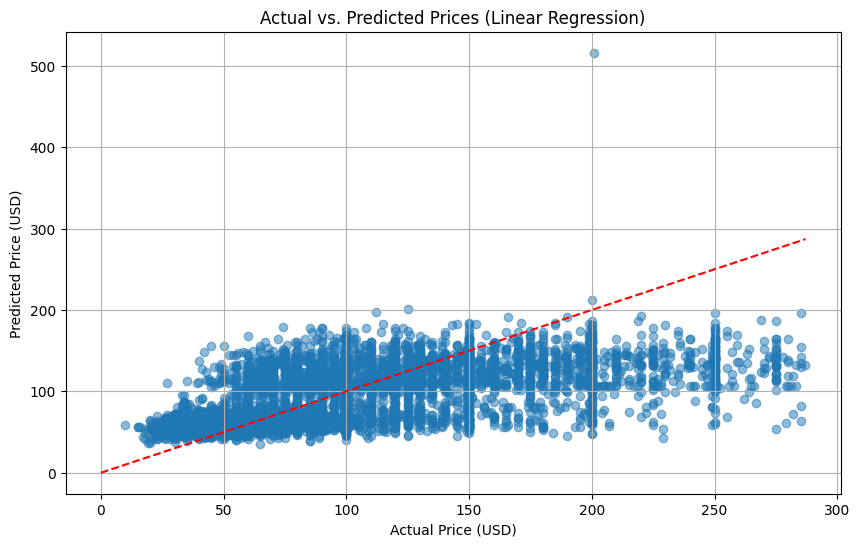

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_test), y_pred_dollar, alpha=0.5)
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.plot([0, max(np.expm1(y_test))], [0, max(np.expm1(y_test))], color="red", linestyle="--")  # Diagonal line
plt.grid(True)
plt.show()

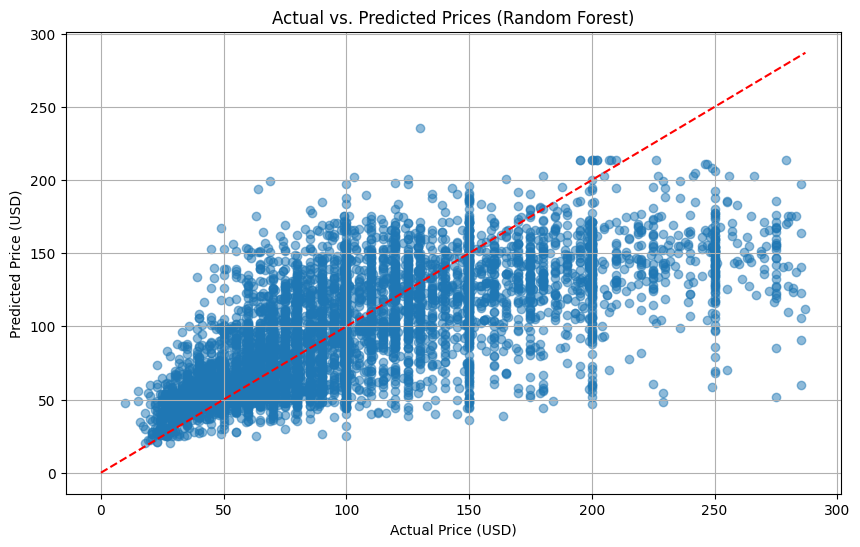

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_test_rf), np.expm1(y_pred_rf), alpha=0.5)
plt.title("Actual vs. Predicted Prices (Random Forest)")
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.plot([0, max(np.expm1(y_test_rf))], [0, max(np.expm1(y_test_rf))], color="red", linestyle="--")  # Diagonal line
plt.grid(True)
plt.show()

Random Forest Feature Importances:
room_type_Private room                   0.469206
neighbourhood_avg_price                  0.235238
room_type_Shared room                    0.083739
host_tenure_years                        0.080481
accommodates                             0.055944
review_scores_accuracy                   0.021889
bedrooms                                 0.018513
host_is_superhost                        0.015070
neighbourhood_grouped_Other              0.007120
neighbourhood_grouped_Midtown            0.002169
neighbourhood_grouped_Hell's Kitchen     0.001706
neighbourhood_grouped_Upper East Side    0.001398
neighbourhood_grouped_Upper West Side    0.001382
neighbourhood_grouped_Crown Heights      0.001179
neighbourhood_grouped_Williamsburg       0.001105
room_type_Hotel room                     0.001072
neighbourhood_grouped_East Village       0.001046
neighbourhood_grouped_Bushwick           0.000916
neighbourhood_grouped_Harlem             0.000826
dtype: float64


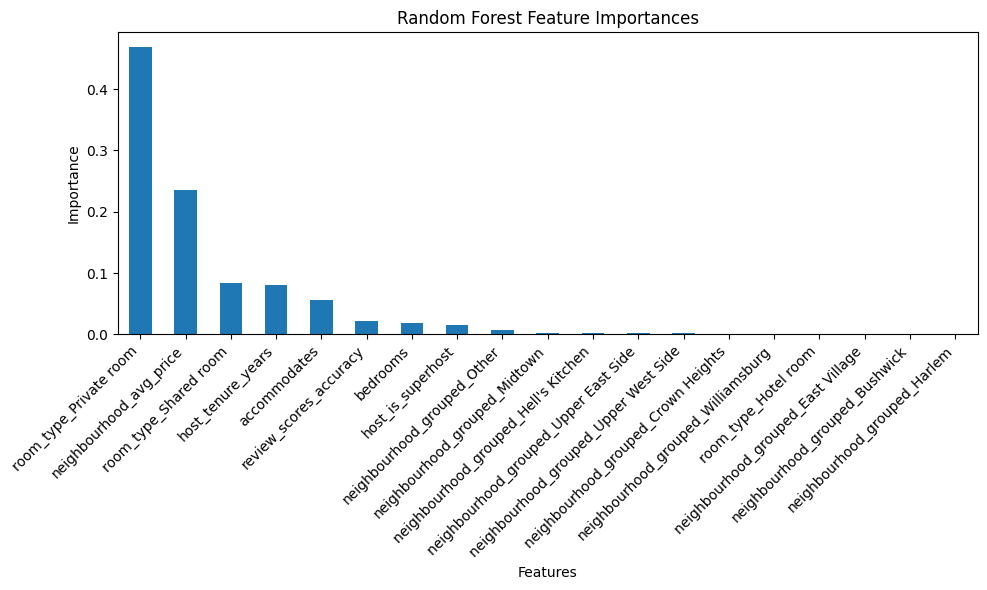

In [ ]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a pandas Series for easier visualization
feature_importances_series = pd.Series(feature_importances, index=X_train_rf.columns)

# Sort the feature importances in descending order
feature_importances_series.sort_values(ascending=False, inplace=True)

# Print the feature importances
print("Random Forest Feature Importances:")
print(feature_importances_series)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
feature_importances_series.plot(kind="bar")
plt.title("Random Forest Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
print(" Model Performance Comparison:")
print("---------------------------------")
print("Linear Regression:")
print(f"  MAE  : {mean_absolute_error(y_test, y_pred):.3f}")
print(f"  RMSE : {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"  R²   : {r2_score(y_test, y_pred):.3f}")
print("---------------------------------")
print("Random Forest:")
print(f"  MAE  : {mean_absolute_error(y_test_rf, y_pred_rf):.3f}")
print(f"  RMSE : {np.sqrt(mean_squared_error(y_test_rf, y_pred_rf)):.3f}")
print(f"  R²   : {r2_score(y_test_rf, y_pred_rf):.3f}")
print("---------------------------------")

 Model Performance Comparison:
---------------------------------
Linear Regression:
  MAE  : 0.331
  RMSE : 0.416
  R²   : 0.444
---------------------------------
Random Forest:
  MAE  : 0.290
  RMSE : 0.371
  R²   : 0.559
---------------------------------


In [ ]:
# Create a DataFrame to display the actual and predicted prices
price_comparison_df = pd.DataFrame({
    "Actual Price": np.expm1(y_test),
    "Linear Regression Predicted Price": y_pred_dollar,
    "Random Forest Predicted Price": np.expm1(y_pred_rf)
})

# Display the DataFrame
display(price_comparison_df.head())

,Actual Price,Linear Regression Predicted Price,Random Forest Predicted Price
16696,200.0,104.891164,101.415747
251888,120.0,96.346241,100.041777
187230,59.0,71.211068,60.149464
192058,62.0,56.259332,68.116013
120185,132.0,73.040273,85.287730
